In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
import pandas as pd 
import sklearn 
df = pd.read_table('data/sms.tsv', 
                   sep='\t', header=None, names=['label', 'msg']) 
df

,label,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<AxesSubplot:>

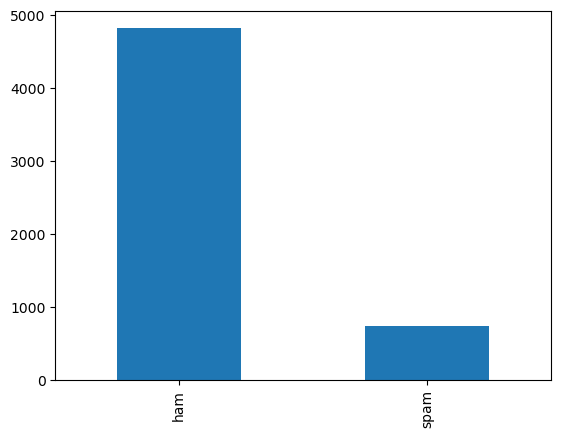

In [37]:
df.label.value_counts().plot(kind="bar")

In [38]:
df.label.value_counts() / df.shape[0]

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [39]:
df.msg = df.msg.apply(lambda x:x.lower()) 
# make all strings lower case so we can search easier 
df[df.msg.str.contains('send cash now')] .shape 
(0, 2) 

(0, 2)

In [40]:
spams = df[df.label == 'spam'] 
for word in ['send', 'cash', 'now']: 
   
    
     print( word, spams[spams.msg.str.contains(word)].shape[0] /
float(spams.shape[0]) )
    

send 0.0963855421686747
cash 0.09103078982597054
now 0.2797858099062918


In [41]:
import sklearn

In [42]:
from sklearn.feature_extraction.text import CountVectorizer 
import pandas as pd

# start with a simple example 
train_simple = ['call you tonight', 
                'Call me a cab', 
                'please call me... PLEASE 44!'] 

# learn the 'vocabulary' of the training data 
vect = CountVectorizer() 
train_simple_dtm = vect.fit_transform(train_simple) 

# check if the data is transformed and fitted properly
print(train_simple_dtm.toarray())

# get feature names
feature_names = vect.get_feature_names_out()
# create dataframe
train_simple_dtm_df = pd.DataFrame(train_simple_dtm.toarray(), columns=feature_names)
train_simple_dtm_df

[[0 0 1 0 0 1 1]
 [0 1 1 1 0 0 0]
 [1 0 1 1 2 0 0]]


,44,cab,call,me,please,tonight,you
0,0,0,1,0,0,1,1
1,0,1,1,1,0,0,0
2,1,0,1,1,2,0,0


In [43]:
# transform testing data into a document-term matrix (using existing vocabulary, notice don't is missing) 
test_simple = ["please don't call me"] 
test_simple_dtm = vect.transform(test_simple) 
test_simple_dtm.toarray() 
pd.DataFrame(test_simple_dtm.toarray(), columns=vect.get_feature_names_out()) 

,44,cab,call,me,please,tonight,you
0,0,0,1,1,1,0,0


In [44]:
# split into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df.msg, df.label, random_state=1) 
 
 
# instantiate the vectorizer 
vect = CountVectorizer() 
 
# learn vocabulary and create document-term matrix in a single step 
train_dtm = vect.fit_transform(X_train) 
train_dtm 

<4179x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 55209 stored elements in Compressed Sparse Row format>

In [45]:
# transform testing data into a document-term matrix 
test_dtm = vect.transform(X_test) 
test_dtm

<1393x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 17604 stored elements in Compressed Sparse Row format>

In [46]:
## MODEL BUILDING WITH NAIVE BAYES 
# train a Naive Bayes model using train_dtm 
from sklearn.naive_bayes import MultinomialNB 
# import our model 
nb = MultinomialNB() 
# instantiate our model 
nb.fit(train_dtm, y_train) 
# fit it to our training set 

MultinomialNB()

In [47]:
# make predictions on test data using test_dtm 
preds = nb.predict(test_dtm) 
preds 

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype='<U4')

In [48]:
# compare predictions to true labels 
from sklearn import metrics 
print(metrics.accuracy_score(y_test, preds)) 
print(metrics.confusion_matrix(y_test, preds)) 

0.9885139985642498
[[1203    5]
 [  11  174]]


In [49]:
nb.classes_

array(['ham', 'spam'], dtype='<U4')

In [51]:
# read in the data 
titanic = pd.read_csv('data/short_titanic.csv') 
 
# encode female as 0 and male as 1 
titanic['Sex'] = titanic.Sex.map({'female':0, 'male':1}) 
 
# fill in the missing values for age with the median age 
titanic.Age.fillna(titanic.Age.median(), inplace=True) 
 
# create a DataFrame of dummy variables for Embarked 
embarked_dummies = pd.get_dummies(titanic.Embarked, prefix='Embarked') 
embarked_dummies.drop(embarked_dummies.columns[0], axis=1, inplace=True) 
 
# concatenate the original DataFrame and the dummy DataFrame 
titanic = pd.concat([titanic, embarked_dummies], axis=1) 
 
# define X and y 
feature_cols = ['Pclass', 'Sex', 'Age', 'Embarked_Q', 'Embarked_S'] 
X = titanic[feature_cols] 
y = titanic.Survived 
 
X.head() 

,Pclass,Sex,Age,Embarked_Q,Embarked_S
0,3,1,22.0,0,1
1,1,0,38.0,0,0
2,3,0,26.0,0,1
3,1,0,35.0,0,1
4,3,1,35.0,0,1


In [52]:
# fit a classification tree with max_depth=3 on all data 
from sklearn.tree import DecisionTreeClassifier 
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1) 
treeclf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [54]:
 DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_leaf=1, 
                             min_samples_split=2, min_weight_fraction_leaf=0.0,
                             max_features=None, random_state=1, splitter='best')

DecisionTreeClassifier(max_depth=3, random_state=1)

In [55]:
# compute the feature importances 
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_})

,feature,importance
0,Pclass,0.242664
1,Sex,0.655584
2,Age,0.064494
3,Embarked_Q,0.000000
4,Embarked_S,0.037258


In [56]:
# centroid calculation 
import numpy as np 
red_point1 = np.array([1, 3]) 
red_point2 = np.array([2, 5]) 
red_point3 = np.array([3, 4]) 
 
red_center = (red_point1 + red_point2 + red_point3) / 3. 
 
red_center  
# array([ 2.,  4.]) 


array([2., 4.])

In [57]:
import pandas as pd
# import the beer dataset 
url = 'data/beer.txt' 
beer = pd.read_csv(url, sep=' ') 
print(beer.shape) 
(20, 5) 
 
beer.head() 

(20, 5)


,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


In [58]:
# define X 
X = beer.drop('name', axis=1) 

In [59]:
# K-means with 3 clusters 
from sklearn.cluster import KMeans 
km = KMeans(n_clusters=3, random_state=1) 
km.fit(X) 

KMeans(n_clusters=3, random_state=1)

In [60]:
# save the cluster labels and sort by cluster 
beer['cluster'] = km.labels_

In [61]:
# calculate the mean of each feature for each cluster 
beer.groupby('cluster').mean() 

,calories,sodium,alcohol,cost
cluster,,,,
0,150.00,17.0,4.521429,0.520714
1,102.75,10.0,4.075000,0.440000
2,70.00,10.5,2.600000,0.420000


Text(0, 0.5, 'alcohol')

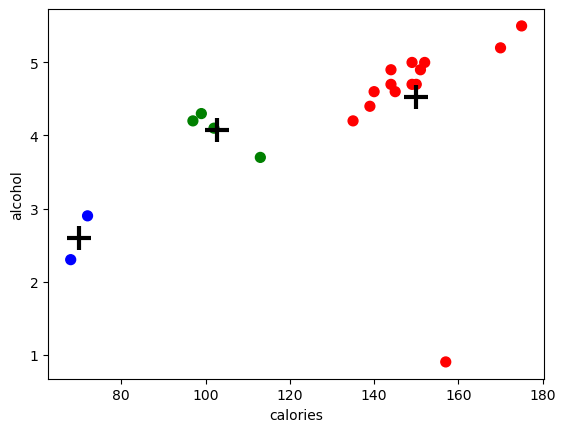

In [62]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
 
 
# save the DataFrame of cluster centers 
centers = beer.groupby('cluster').mean() 
# create a "colors" array for plotting 
colors = np.array(['red', 'green', 'blue', 'yellow']) 
# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue) 
plt.scatter(beer.calories, beer.alcohol, c=colors[list(beer.cluster)], s=50) 
 
# cluster centers, marked by "+" 
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black') 
 
# add labels 
plt.xlabel('calories') 
plt.ylabel('alcohol') 


In [65]:
# calculate Silhouette Coefficient for K=3 
from sklearn import metrics 
metrics.silhouette_score(X, km.labels_) 

0.6731775046455796

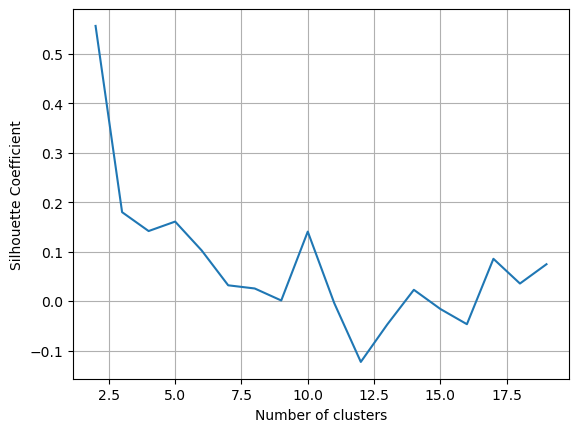

In [66]:
# center and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn import metrics
# calculate SC for K=2 through K=19 
k_range = range(2, 20) 
scores = [] 
for k in k_range: 
    km = KMeans(n_clusters=k, random_state=1) 
    km.fit(X_scaled) 
    scores.append(metrics.silhouette_score(X, km.labels_)) 
 
# plot the results 
plt.plot(k_range, scores) 
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette Coefficient') 
plt.grid(True) 

In [67]:
# center and scale the data 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
 
# K-means with 3 clusters on scaled data 
km = KMeans(n_clusters=3, random_state=1) 
km.fit(X_scaled) 

KMeans(n_clusters=3, random_state=1)

In [68]:
X.shape

(20, 4)

In [69]:
X.shape
d = 1 
# Let's look for points within 1 unit of one another 
 
X_first_word = X.iloc[:,:1]
# Only looking at the first column, but ALL of the rows -  X[:,:1]
 
from sklearn.neighbors import NearestNeighbors 
# this module will calculate for us distances between each point 
 
neigh = NearestNeighbors(n_neighbors=18) 
neigh.fit(X_first_word) 
# tell the module to calculate each distance between each point 

NearestNeighbors(n_neighbors=18)

In [70]:
A = neigh.kneighbors_graph(X_first_word, mode='distance').todense() 
# This matrix holds all distances (over 16 million of them) 
 
num_points_within_d = (A < d).sum() 
# Count the number of pairs of points within 1 unit of distance 
 
num_points_within_d 

64

In [71]:
X_first_two_words = X.iloc[:,:2] 
neigh = NearestNeighbors(n_neighbors=18) 
neigh.fit(X_first_two_words) 
A = neigh.kneighbors_graph(X_first_two_words, mode='distance').todense() 
num_points_within_d = (A < d).sum() 
 
num_points_within_d 

60

In [72]:
d = 1 
# Scan for points within one unit 
 
num_columns = range(1, 10) 
# Looking at the first 100 columns 
points = [] 
# We will be collecting the number of points within 1 unit for a graph 
 
neigh = NearestNeighbors(n_neighbors=X.shape[0]) 
for subset in num_columns: 
    X_subset = X.iloc[:,:subset] 
  # look at the first column, then first two columns, then first three columns, etc 
    neigh.fit(X_subset) 
    A = neigh.kneighbors_graph(X_subset, mode='distance').todense() 
    num_points_within_d = (A < d).sum() 
# calculate the number of points within 1 unit 
    points.append(num_points_within_d) 

In [73]:
neigh = NearestNeighbors(n_neighbors=20) 
neigh.fit(X) 
A = neigh.kneighbors_graph(X, mode='distance').todense() 
num_points_within_d = (A < d).sum() 

In [74]:
d = 1 
# Scan for points within one unit 
 
num_columns = range(1, 100) 
# Looking at the first 100 columns 
points = [] 
# We will be collecting the number of points within 1 unit for a graph 
 
neigh = NearestNeighbors(n_neighbors=X.shape[0]) 
for subset in num_columns: 
    X_subset = X.iloc[:,:subset] 
  # look at the first column, then first two columns, then first three columns, etc 
    neigh.fit(X_subset) 
    A = neigh.kneighbors_graph(X_subset, mode='distance').todense() 
    num_points_within_d = (A < d).sum() 
# calculate the number of points within 1 unit 
    points.append(num_points_within_d)  

In [75]:
url = 'data/yelp.csv' 
yelp = pd.read_csv(url, encoding='unicode-escape') 
 
# create a new DataFrame that only contains the 5-star and 1-star reviews 
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)] 
 
# define X and y 
X = yelp_best_worst.text 
y = yelp_best_worst.stars == 5 


In [76]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression() 
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100) 
# Make our training and testing sets 
vect = CountVectorizer(stop_words='english') 
# Count the number of words but remove stop words like a, an, the, you, etc 
X_train_dtm = vect.fit_transform(X_train) 
X_test_dtm = vect.transform(X_test) 
# transform our text into document term matrices 
lr.fit(X_train_dtm, y_train) 
# fit to our training set 
lr.score(X_test_dtm, y_test) 
# score on our testing set 

0.91193737

In [77]:
vect = CountVectorizer(stop_words='english', max_features=100) 
# Only use the 100 most used words 
 
X_train_dtm = vect.fit_transform(X_train) 
X_test_dtm = vect.transform(X_test) 
print(X_test_dtm.shape)  # (1022, 100) 

(1022, 100)


In [79]:
from sklearn import decomposition 
# We will be creating 100 super columns 
 
vect = CountVectorizer(stop_words='english') 
# Don't ignore any words 
pca  = decomposition.PCA(n_components=100) 
# instantate a pca object 
 
X_train_dtm = vect.fit_transform(X_train).todense() 
# Convert the sparse matrix to a numpy array 
X_train_dtm = np.asarray(X_train_dtm) 
X_train_dtm = pca.fit_transform(X_train_dtm) 
 
X_test_dtm = vect.transform(X_test).todense() 
# Convert the sparse matrix to a numpy array 
X_test_dtm = np.asarray(X_test_dtm) 
X_test_dtm = pca.transform(X_test_dtm) 

print( X_test_dtm.shape)  # (1022, 100) 
 
lr.fit(X_train_dtm, y_train) 
 
lr.score(X_test_dtm, y_test) 

(1022, 100)


0.8972602739726028

In [80]:
from sklearn.datasets import fetch_lfw_people 
 
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4) 
 
# introspect the images arrays to find the shapes (for plotting) 
n_samples, h, w = lfw_people.images.shape 
 
# for machine learning we use the 2 data directly (as relative pixel 
# positions info is ignored by this model) 
X = lfw_people.data 
y = lfw_people.target 
n_features = X.shape[1] 
X.shape

(1288, 1850)

'Hugo Chavez'

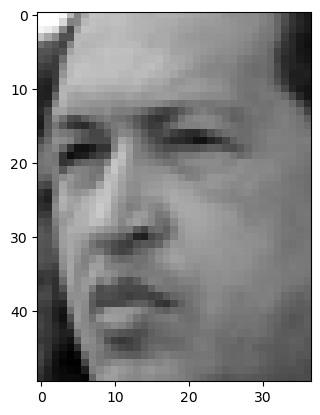

In [81]:
plt.imshow(X[0].reshape((h, w)), cmap=plt.cm.gray) 
lfw_people.target_names[y[0]] 
'Hugo Chavez' 

'George W Bush'

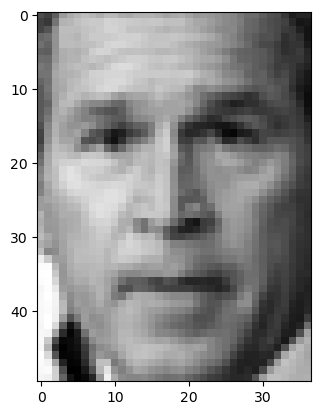

In [82]:
plt.imshow(X[100].reshape((h, w)), cmap=plt.cm.gray) 
lfw_people.target_names[y[100]] 
'George W Bush'

In [83]:
# the label to predict is the id of the person 
target_names = lfw_people.target_names 
n_classes = target_names.shape[0] 
 
print("Total dataset size:") 
print("n_samples: %d" % n_samples) 
print("n_features: %d" % n_features) 
print("n_classes: %d" % n_classes) 

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [84]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
from time import time  # for timing our work 
 
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size=0.25, random_state=1) 
# get our training and test set 
 
t0 = time() # get the time now 
logreg = LogisticRegression() 
 
logreg.fit(X_train, y_train) 
 
# Predicting people's names on the test set 
y_pred = logreg.predict(X_test) 
 
print( accuracy_score(y_pred, y_test), "Accuracy") 
print( (time() - t0), "seconds" )

0.8509316770186336 Accuracy
0.350754976272583 seconds


In [86]:
# split into a training and testing set# split i 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1)
# will use x_test as sample OOS data

###############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
pca = decomposition.PCA(n_components=n_components, whiten=True).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Extracting the top 150 eigenfaces from 966 faces
Projecting the input data on the eigenfaces orthonormal basis


In [87]:
t0 = time() 
# Predicting people's names on the test set WITH PCA 
logreg.fit(X_train_pca, y_train) 
y_pred = logreg.predict(X_test_pca) 
print( accuracy_score(y_pred, y_test), "Accuracy" )
print( (time() - t0), "seconds" )

0.7981366459627329 Accuracy
0.02793288230895996 seconds


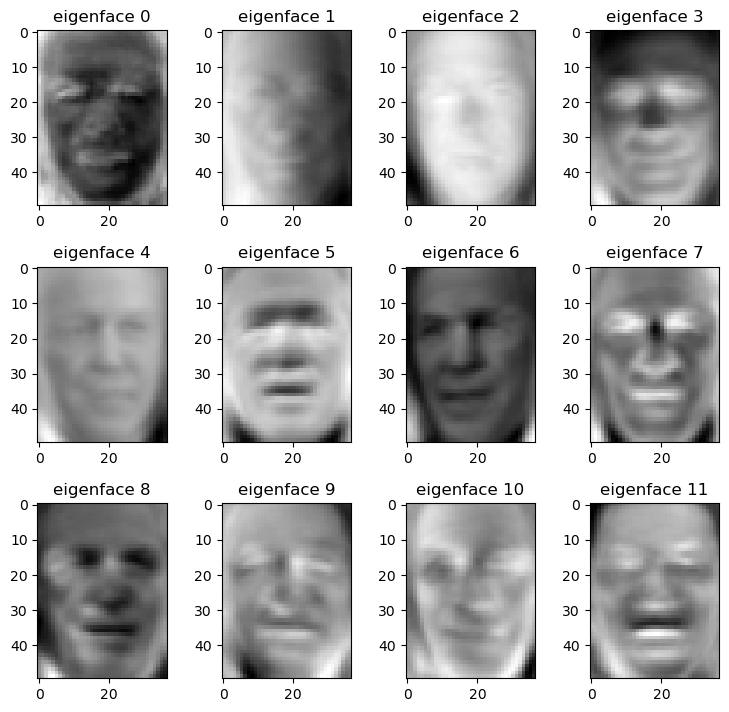

In [88]:
def plot_gallery(images, titles, n_row=3, n_col=4): 
    """Helper function to plot a gallery of portraits""" 
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row)) 
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35) 
    for i in range(n_row * n_col): 
        plt.subplot(n_row, n_col, i + 1) 
        plt.imshow(images[i], cmap=plt.cm.gray) 
        plt.title(titles[i], size=12) 
 
# plot the gallery of the most significative eigenfaces 
eigenfaces = pca.components_.reshape((n_components, h, w)) 
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])] 
plot_gallery(eigenfaces, eigenface_titles) 
 
plt.show() 